In [1]:
# Import libraries

import datetime
import os
import warnings
from datetime import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


path = "/Users/Hriday Govind/Documents/MSc/Thesis Final Submission/" # Replace wiith own path

os.chdir(path)

In [2]:
# Import data

rolex_prices = pd.read_csv("Data/Rolex_index.csv")
ap_prices = pd.read_csv("Data/Audemars_Piguet_index.csv")
pp_prices = pd.read_csv("Data/Patek_Philippe_index.csv")

equity_w = pd.read_csv("Data/Equity_w.csv", parse_dates = ['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'),index_col = 'Date')
real_estate = pd.read_csv("Data/Real_Estate.csv", parse_dates = ['DATE'],index_col = 'DATE')
taxes = pd.read_csv("Data/Personal_Current_Taxes.csv", parse_dates = ['DATE'],index_col = 'DATE')
unemployment = pd.read_csv("Data/Unemployment_Rate.csv", parse_dates = ['DATE'],index_col = 'DATE')
int_rates = pd.read_csv("Data/Interest_Rate.csv", parse_dates = ['DATE'],index_col = 'DATE')
uncertainty = pd.read_csv("Data/Uncertainty.csv", parse_dates = ['DATE'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'),index_col = 'DATE')
usd_index = pd.read_csv("Data/USD_Index.csv", parse_dates = ['DATE'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'),index_col = 'DATE')
bond = pd.read_csv("Data/10 yr bond.csv", parse_dates = ['DATE'],date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'),index_col = 'DATE')
pce_watch = pd.read_csv("Data/PCE_Watches.csv", parse_dates = ['DATE'],index_col = 'DATE')
real_estate_vol = pd.read_csv("Data/Real_Estate_Volatility.csv", parse_dates = ['DATE'],index_col = 'DATE')
M1 = pd.read_csv("Data/M1.csv", parse_dates = ['DATE'],index_col = 'DATE')
CCO = pd.read_csv("Data/CCO.csv", parse_dates = ['DATE'],index_col = 'DATE')

cci = pd.read_csv("Data/CCI.csv", parse_dates = ['DATE'],index_col = 'DATE')
cpi = pd.read_csv("Data/CPI.csv", parse_dates = ['DATE'], index_col = 'DATE')

C:\Users\Hriday Govind\AppData\Local\Temp\ipykernel_16024\2384287372.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  equity_w = pd.read_csv("Data/Equity_w.csv", parse_dates = ['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'),index_col = 'Date')
C:\Users\Hriday Govind\AppData\Local\Temp\ipykernel_16024\2384287372.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  uncertainty = pd.read_csv("Data/Uncertainty.csv", parse_dates = ['DATE'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'),index_col = 'DATE')
C:\Users\Hriday Govind\AppData\Local\Temp\ipykernel_16024\2384287372.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be rem

In [3]:
# Clean data

rolex_prices['date'] = pd.to_datetime(rolex_prices['date']).dt.date
rolex_prices.set_index(pd.to_datetime(rolex_prices['date']), inplace=True)
rolex_prices['Year'] = rolex_prices.index.year
rolex_prices['Month'] = rolex_prices.index.month
rolex_prices['Week'] = (rolex_prices.index.day - 1) // 7 + 1
rolex_prices.reset_index(drop = True, inplace = True)
rolex_prices = rolex_prices[['Year','Month','Week','Rolex Market Index (USD)']]

ap_prices['date'] = pd.to_datetime(ap_prices['date']).dt.date
ap_prices.set_index(pd.to_datetime(ap_prices['date']), inplace=True)
ap_prices['Year'] = ap_prices.index.year
ap_prices['Month'] = ap_prices.index.month
ap_prices['Week'] = (ap_prices.index.day - 1) // 7 + 1
ap_prices.reset_index(drop = True, inplace = True)
ap_prices = ap_prices[['Year','Month','Week','Audemars Piguet Market Index (USD)']]

pp_prices['date'] = pd.to_datetime(pp_prices['date']).dt.date
pp_prices.set_index(pd.to_datetime(pp_prices['date']), inplace=True)
pp_prices['Year'] = pp_prices.index.year
pp_prices['Month'] = pp_prices.index.month
pp_prices['Week'] = (pp_prices.index.day - 1) // 7 + 1
pp_prices.reset_index(drop = True, inplace = True)
pp_prices = pp_prices[['Year','Month','Week','Patek Philippe Market Index (USD)']]

In [4]:
# Price data aggregation

rolex_prices_w = rolex_prices.groupby(['Year','Month','Week']).mean()
rolex_prices_w = rolex_prices_w.reset_index()
rolex_prices_w = rolex_prices_w.drop_duplicates(subset=['Year', 'Month', 'Week'])

ap_prices_w = ap_prices.groupby(['Year','Month','Week']).mean()
ap_prices_w = ap_prices_w.reset_index()
ap_prices_w = ap_prices_w.drop_duplicates(subset=['Year', 'Month', 'Week'])

pp_prices_w = pp_prices.groupby(['Year','Month','Week']).mean()
pp_prices_w = pp_prices_w.reset_index()
pp_prices_w = pp_prices_w.drop_duplicates(subset=['Year', 'Month', 'Week'])

price_df = rolex_prices_w
price_df = price_df.merge(ap_prices_w, on=["Year", "Month", "Week"], how="left")
price_df = price_df.merge(pp_prices_w, on=["Year", "Month", "Week"], how="left")
price_df['Watch Price Index'] = (0.56*price_df['Rolex Market Index (USD)']) + (0.26*price_df['Patek Philippe Market Index (USD)']) + (0.18*price_df['Audemars Piguet Market Index (USD)'])
price_df = price_df.drop(['Rolex Market Index (USD)','Patek Philippe Market Index (USD)','Audemars Piguet Market Index (USD)'],axis = 1)
price_df

,Year,Month,Week,Watch Price Index
0,2017,1,1,28649.562857
1,2017,1,2,28689.891429
2,2017,1,3,28672.951429
3,2017,1,4,28647.905714
4,2017,1,5,28658.200000
...,...,...,...,...
366,2023,3,3,66719.894286
367,2023,3,4,66682.991429
368,2023,3,5,66732.026667
369,2023,4,1,66766.014286


In [5]:
equity_w['Year'] = equity_w.index.year
equity_w['Month'] = equity_w.index.month
equity_w['Week'] = (equity_w.index.day - 1) // 7 + 1
equity_w.reset_index(drop = True, inplace = True)
equity_w = equity_w[['Year','Month','Week','Total Stock Market ETF Price','Total Stock Market ETF Volatility']]
equity_w = equity_w.drop_duplicates(subset=['Year', 'Month', 'Week'])

In [6]:
real_estate['Year'] = real_estate.index.year
real_estate['Month'] = real_estate.index.month
real_estate['Week'] = (real_estate.index.day - 1) // 7 + 1
real_estate.reset_index(drop = True, inplace = True)
real_estate = real_estate[['Year','Month','Week','Real_Estate']]
real_estate = real_estate.drop_duplicates(subset=['Year', 'Month', 'Week'])

taxes['Year'] = taxes.index.year
taxes['Month'] = taxes.index.month
taxes['Week'] = (taxes.index.day - 1) // 7 + 1
taxes.reset_index(drop = True, inplace = True)
taxes = taxes[['Year','Month','Week','Personal_Current_Taxes']]
taxes = taxes.drop_duplicates(subset=['Year', 'Month', 'Week'])

unemployment['Year'] = unemployment.index.year
unemployment['Month'] = unemployment.index.month
unemployment['Week'] = (unemployment.index.day - 1) // 7 + 1
unemployment.reset_index(drop = True, inplace = True)
unemployment = unemployment[['Year','Month','Week','Unemployment_Rate']]
unemployment = unemployment.drop_duplicates(subset=['Year', 'Month', 'Week'])

uncertainty['Year'] = uncertainty.index.year
uncertainty['Month'] = uncertainty.index.month
uncertainty['Week'] = (uncertainty.index.day - 1) // 7 + 1
uncertainty.reset_index(drop = True, inplace = True)
uncertainty = uncertainty[['Year','Month','Week','Uncertainty']]
uncertainty = uncertainty.drop_duplicates(subset=['Year', 'Month', 'Week'])
uncertainty = uncertainty.groupby(['Year','Month','Week']).mean()
uncertainty = uncertainty.reset_index()

int_rates['Year'] = int_rates.index.year
int_rates['Month'] = int_rates.index.month
int_rates['Week'] = (int_rates.index.day - 1) // 7 + 1
int_rates.reset_index(drop = True, inplace = True)
int_rates = int_rates[['Year','Month','Week','Interest_Rate']]
int_rates = int_rates.drop_duplicates(subset=['Year', 'Month', 'Week'])

usd_index['USD_Index'] = usd_index['USD_Index'].replace('.', np.nan)
usd_index = usd_index.dropna()
usd_index['USD_Index'] = usd_index['USD_Index'].astype(float)
usd_index['Year'] = usd_index.index.year
usd_index['Month'] = usd_index.index.month
usd_index['Week'] = (usd_index.index.day - 1) // 7 + 1
usd_index.reset_index(drop = True, inplace = True)
usd_index = usd_index[['Year','Month','Week','USD_Index']]
usd_index = usd_index.groupby(['Year','Month','Week']).mean()
usd_index = usd_index.reset_index()
usd_index = usd_index.drop_duplicates(subset=['Year', 'Month', 'Week'])

bond['Year'] = bond.index.year
bond['Month'] = bond.index.month
bond['Week'] = (bond.index.day - 1) // 7 + 1
bond.reset_index(drop = True, inplace = True)
bond = bond[['Year','Month','Week','10-Yr Yield']]
bond = bond.drop_duplicates(subset=['Year', 'Month', 'Week'])
bond = bond.groupby(['Year','Month','Week']).mean()
bond = bond.reset_index()

pce_watch['Year'] = pce_watch.index.year
pce_watch['Month'] = pce_watch.index.month
pce_watch['Week'] = (pce_watch.index.day - 1) // 7 + 1
pce_watch.reset_index(drop=True, inplace=True)
pce_watch = pce_watch[['Year', 'Month', 'Week', 'PCE_Watches']]
pce_watch = pce_watch.drop_duplicates(subset=['Year', 'Month', 'Week'])

real_estate_vol['Year'] = real_estate_vol.index.year
real_estate_vol['Month'] = real_estate_vol.index.month
real_estate_vol['Week'] = (real_estate_vol.index.day - 1) // 7 + 1
real_estate_vol.reset_index(drop = True, inplace = True)
real_estate_vol = real_estate_vol[['Year','Month','Week','Real_Estate_Volatility']]
real_estate_vol = real_estate_vol.drop_duplicates(subset=['Year', 'Month', 'Week'])

M1['Year'] = M1.index.year
M1['Month'] = M1.index.month
M1['Week'] = (M1.index.day - 1) // 7 + 1
M1.reset_index(drop = True, inplace = True)
M1 = M1[['Year','Month','Week','M1']]
M1 = M1.drop_duplicates(subset=['Year', 'Month', 'Week'])

CCO['Year'] = CCO.index.year
CCO['Month'] = CCO.index.month
CCO['Week'] = (CCO.index.day - 1) // 7 + 1
CCO.reset_index(drop = True, inplace = True)
CCO = CCO[['Year','Month','Week','CCO']]
CCO = CCO.drop_duplicates(subset=['Year', 'Month', 'Week'])

In [7]:
cci['Year'] = cci.index.year
cci['Month'] = cci.index.month
cci['Week'] = (cci.index.day - 1) // 7 + 1
cci.reset_index(drop = True, inplace = True)
cci = cci[['Year','Month','Week','CCI']]
cci_w = cci
cci_w = cci_w.drop_duplicates(subset=['Year', 'Month', 'Week'])

cpi['Year'] = cpi.index.year
cpi['Month'] = cpi.index.month
cpi['Week'] = (cpi.index.day - 1) // 7 + 1
cpi['CPI'] = cpi['CPI']/100
cpi.reset_index(drop = True, inplace = True)
cpi = cpi[['Year','Month','Week','CPI']]
cpi_w = cpi
cpi_w = cpi_w.drop_duplicates(subset=['Year', 'Month', 'Week'])

## Weekly Timeframe analysis

In [8]:
# Combining data into a dataframe
weekly_df = equity_w
weekly_df = weekly_df.merge(cci_w, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(real_estate, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(taxes, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(unemployment, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(uncertainty, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(int_rates, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(usd_index, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(bond, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(pce_watch, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(real_estate_vol, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(M1, on=["Year", "Month", "Week"], how="left") 
weekly_df = weekly_df.merge(CCO, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(price_df, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.merge(cpi_w, on=["Year", "Month", "Week"], how="left")
weekly_df = weekly_df.dropna()
weekly_df = weekly_df.reset_index(drop = True)
weekly_df

,Year,Month,Week,Total Stock Market ETF Price,Total Stock Market ETF Volatility,CCI,Real_Estate,Personal_Current_Taxes,Unemployment_Rate,Uncertainty,Interest_Rate,USD_Index,10-Yr Yield,PCE_Watches,Real_Estate_Volatility,M1,CCO,Watch Price Index,CPI
0,2017,1,1,117.23,13.67,101.382100,184.6590,1999.10,4.70,235.10,0.650,118.579850,2.35,12.580,4.667220,3389.30,3645.970,28649.562857,1.024564
1,2017,1,2,117.22,12.34,101.379580,184.7324,2000.64,4.68,272.01,0.652,118.351860,2.36,12.554,4.595912,3391.52,3643.004,28689.891429,1.025208
2,2017,1,3,116.91,9.61,101.377060,184.8058,2002.18,4.66,188.29,0.654,117.769867,2.47,12.528,4.524604,3393.74,3640.038,28672.951429,1.025853
3,2017,1,4,118.16,9.56,101.374540,184.8792,2003.72,4.64,185.71,0.656,117.117900,2.49,12.502,4.453296,3395.96,3637.072,28647.905714,1.026498
4,2017,2,1,118.42,9.19,101.369500,185.0260,2006.80,4.60,158.28,0.660,116.076280,2.46,12.450,4.310680,3400.40,3631.140,28642.977143,1.027787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2022,12,1,203.99,21.24,96.965490,294.3200,3220.30,3.50,177.11,4.100,122.438160,3.51,19.940,7.173420,19830.80,4785.810,69400.865714,1.252218
289,2022,12,2,196.70,22.23,97.084994,293.6744,3113.22,3.46,81.81,4.192,122.213580,3.56,20.268,7.023032,19727.00,4787.682,69470.240000,1.256223
290,2022,12,3,192.69,23.03,97.144746,293.3516,3059.68,3.44,114.95,4.238,122.404240,3.48,20.432,6.947838,19675.10,4788.618,69138.371429,1.258225
291,2022,12,4,191.42,22.64,97.204498,293.0288,3006.14,3.42,98.69,4.284,121.976125,3.75,20.596,6.872644,19623.20,4789.554,68898.031429,1.260228


In [9]:
# Cleaning dates

date_strings = weekly_df.apply(lambda x: f"{int(x['Year'])}-{int(x['Month']):02d}-{int(x['Week']) * 7 - 6:02d}", axis=1)
weekly_df.index = pd.to_datetime(date_strings)
weekly_df = weekly_df.drop(['Year', 'Month', 'Week'], axis=1)
weekly_df

,Total Stock Market ETF Price,Total Stock Market ETF Volatility,CCI,Real_Estate,Personal_Current_Taxes,Unemployment_Rate,Uncertainty,Interest_Rate,USD_Index,10-Yr Yield,PCE_Watches,Real_Estate_Volatility,M1,CCO,Watch Price Index,CPI
2017-01-01,117.23,13.67,101.382100,184.6590,1999.10,4.70,235.10,0.650,118.579850,2.35,12.580,4.667220,3389.30,3645.970,28649.562857,1.024564
2017-01-08,117.22,12.34,101.379580,184.7324,2000.64,4.68,272.01,0.652,118.351860,2.36,12.554,4.595912,3391.52,3643.004,28689.891429,1.025208
2017-01-15,116.91,9.61,101.377060,184.8058,2002.18,4.66,188.29,0.654,117.769867,2.47,12.528,4.524604,3393.74,3640.038,28672.951429,1.025853
2017-01-22,118.16,9.56,101.374540,184.8792,2003.72,4.64,185.71,0.656,117.117900,2.49,12.502,4.453296,3395.96,3637.072,28647.905714,1.026498
2017-02-01,118.42,9.19,101.369500,185.0260,2006.80,4.60,158.28,0.660,116.076280,2.46,12.450,4.310680,3400.40,3631.140,28642.977143,1.027787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,203.99,21.24,96.965490,294.3200,3220.30,3.50,177.11,4.100,122.438160,3.51,19.940,7.173420,19830.80,4785.810,69400.865714,1.252218
2022-12-08,196.70,22.23,97.084994,293.6744,3113.22,3.46,81.81,4.192,122.213580,3.56,20.268,7.023032,19727.00,4787.682,69470.240000,1.256223
2022-12-15,192.69,23.03,97.144746,293.3516,3059.68,3.44,114.95,4.238,122.404240,3.48,20.432,6.947838,19675.10,4788.618,69138.371429,1.258225
2022-12-22,191.42,22.64,97.204498,293.0288,3006.14,3.42,98.69,4.284,121.976125,3.75,20.596,6.872644,19623.20,4789.554,68898.031429,1.260228


In [10]:
# Exporting for further analysis in R
# weekly_df.to_csv('Final Dataframes/full_df_revised.csv') # Uncomment if needed

# Correlation plot of stationary time series

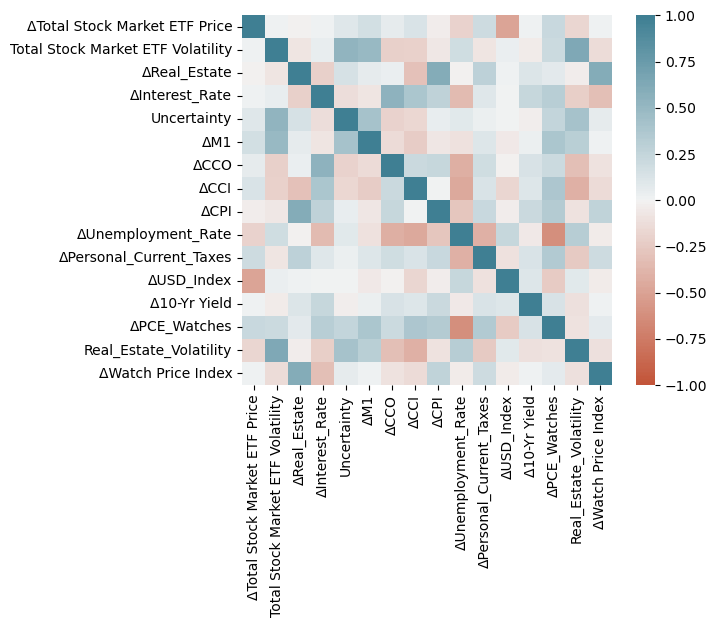

In [11]:
stationary_df = pd.read_csv('Data/stationary_df.csv')
corr = stationary_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

## Including Sentiment

In [12]:
# Import data

sentiment = pd.read_csv("Data/Sentiment_score.csv", parse_dates = ['DATE'],index_col = 'DATE')
google_trends = pd.read_csv("Data/google_trends.csv", parse_dates = ['DATE'],index_col = 'DATE')

In [13]:
# Clean and aggregate data

sentiment['Year'] = sentiment.index.year
sentiment['Month'] = sentiment.index.month
sentiment['Week'] = (sentiment.index.day - 1) // 7 + 1
sentiment.reset_index(drop = True, inplace = True)
sentiment = sentiment[['Year','Month','Week','Sentiment_score']]
sentiment = sentiment.drop_duplicates(subset=['Year', 'Month', 'Week'])

google_trends['Year'] = google_trends.index.year
google_trends['Month'] = google_trends.index.month
google_trends['Week'] = (google_trends.index.day - 1) // 7 + 1
google_trends.reset_index(drop = True, inplace = True)
google_trends = google_trends[['Year','Month','Week','Google_trends']]
google_trends = google_trends.drop_duplicates(subset=['Year', 'Month', 'Week'])

In [14]:
# Combine into dataframe

weekly_df_sentiment = equity_w
weekly_df_sentiment = weekly_df_sentiment.merge(cci_w, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(real_estate, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(taxes, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(unemployment, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(uncertainty, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(int_rates, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(usd_index, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(bond, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(pce_watch, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(real_estate_vol, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(M1, on=["Year", "Month", "Week"], how="left") 
weekly_df_sentiment = weekly_df_sentiment.merge(CCO, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(price_df, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(cpi_w, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(sentiment, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.merge(google_trends, on=["Year", "Month", "Week"], how="left")
weekly_df_sentiment = weekly_df_sentiment.dropna()
weekly_df_sentiment = weekly_df_sentiment.reset_index(drop = True)
weekly_df_sentiment

,Year,Month,Week,Total Stock Market ETF Price,Total Stock Market ETF Volatility,CCI,Real_Estate,Personal_Current_Taxes,Unemployment_Rate,Uncertainty,...,USD_Index,10-Yr Yield,PCE_Watches,Real_Estate_Volatility,M1,CCO,Watch Price Index,CPI,Sentiment_score,Google_trends
0,2017,1,1,117.23,13.67,101.382100,184.6590,1999.10,4.70,235.10,...,118.579850,2.35,12.580,4.667220,3389.30,3645.970,28649.562857,1.024564,0.142992,60.0
1,2017,1,2,117.22,12.34,101.379580,184.7324,2000.64,4.68,272.01,...,118.351860,2.36,12.554,4.595912,3391.52,3643.004,28689.891429,1.025208,0.143525,57.6
2,2017,1,3,116.91,9.61,101.377060,184.8058,2002.18,4.66,188.29,...,117.769867,2.47,12.528,4.524604,3393.74,3640.038,28672.951429,1.025853,0.144058,56.4
3,2017,1,4,118.16,9.56,101.374540,184.8792,2003.72,4.64,185.71,...,117.117900,2.49,12.502,4.453296,3395.96,3637.072,28647.905714,1.026498,0.144591,55.2
4,2017,2,1,118.42,9.19,101.369500,185.0260,2006.80,4.60,158.28,...,116.076280,2.46,12.450,4.310680,3400.40,3631.140,28642.977143,1.027787,0.146845,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2022,12,1,203.99,21.24,96.965490,294.3200,3220.30,3.50,177.11,...,122.438160,3.51,19.940,7.173420,19830.80,4785.810,69400.865714,1.252218,0.183641,98.0
283,2022,12,2,196.70,22.23,97.084994,293.6744,3113.22,3.46,81.81,...,122.213580,3.56,20.268,7.023032,19727.00,4787.682,69470.240000,1.256223,0.192159,96.0
284,2022,12,3,192.69,23.03,97.144746,293.3516,3059.68,3.44,114.95,...,122.404240,3.48,20.432,6.947838,19675.10,4788.618,69138.371429,1.258225,0.200678,94.0
285,2022,12,4,191.42,22.64,97.204498,293.0288,3006.14,3.42,98.69,...,121.976125,3.75,20.596,6.872644,19623.20,4789.554,68898.031429,1.260228,0.209196,92.0


In [15]:
# Clean dates

date_strings_sentiment = weekly_df_sentiment.apply(lambda x: f"{int(x['Year'])}-{int(x['Month']):02d}-{int(x['Week']) * 7 - 6:02d}", axis=1)
weekly_df_sentiment.index = pd.to_datetime(date_strings_sentiment)
weekly_df_sentiment = weekly_df_sentiment.drop(['Year', 'Month', 'Week'], axis=1)

In [16]:
# Export to R for further analysis
# weekly_df_sentiment.to_csv('Final Dataframes/full_df_textblob.csv') # Uncomment if needed

## Determining test for stationarity

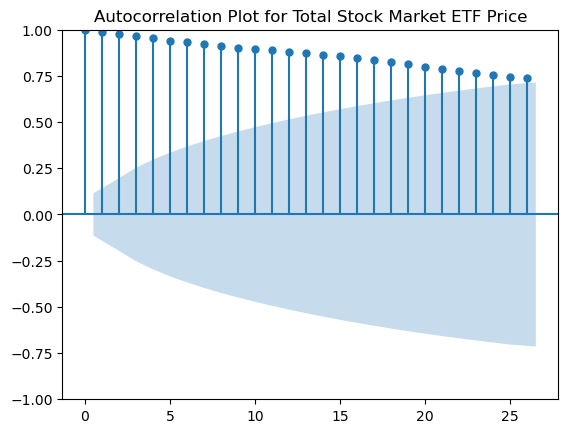

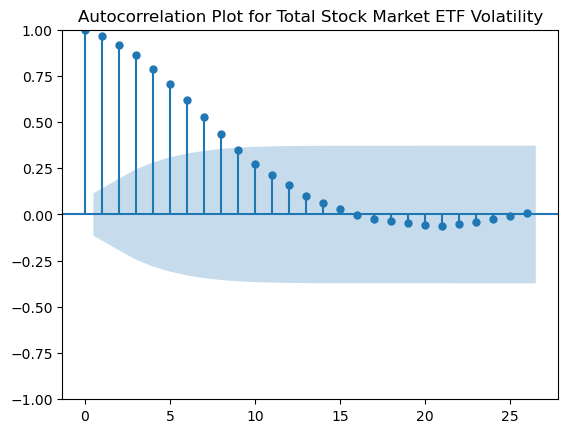

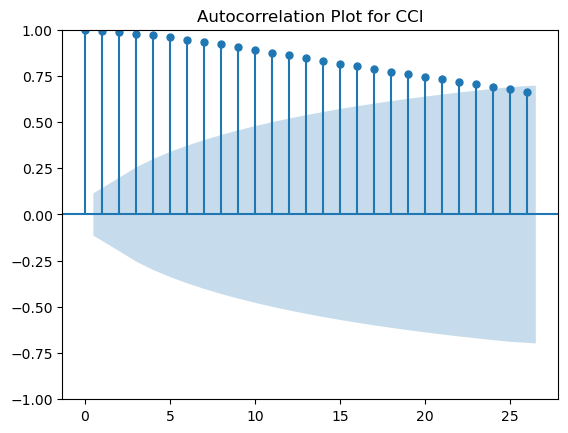

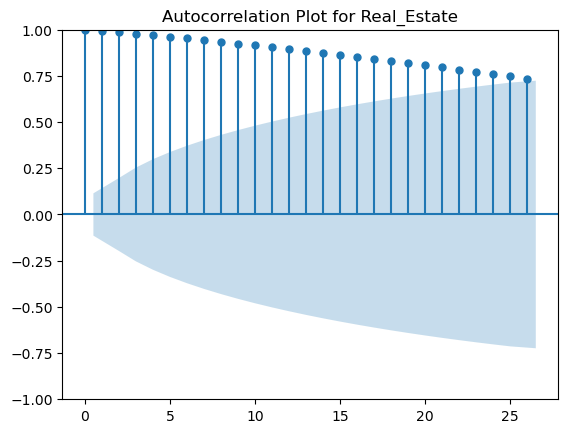

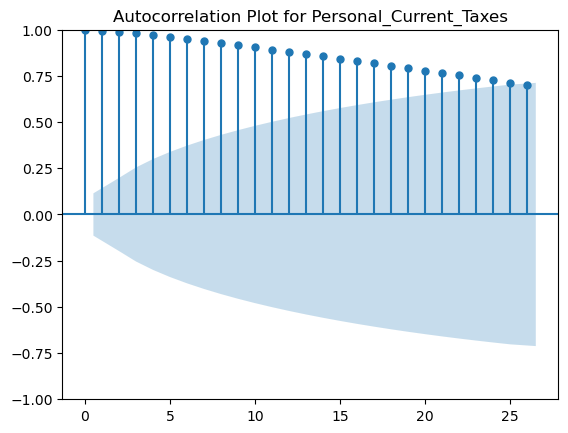

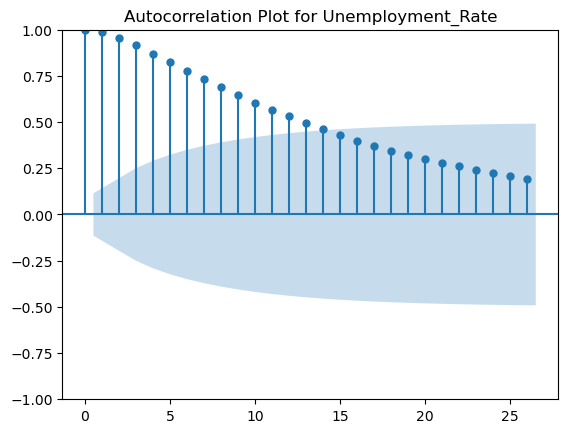

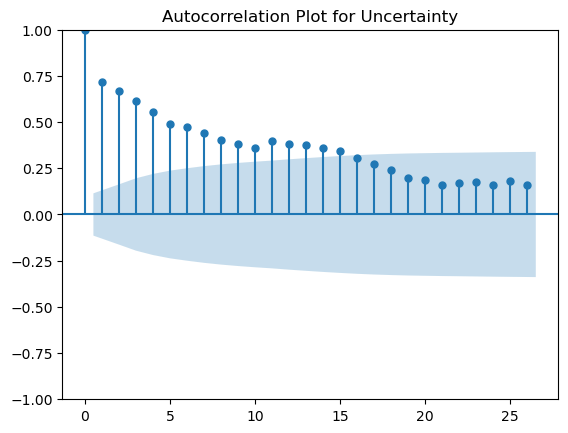

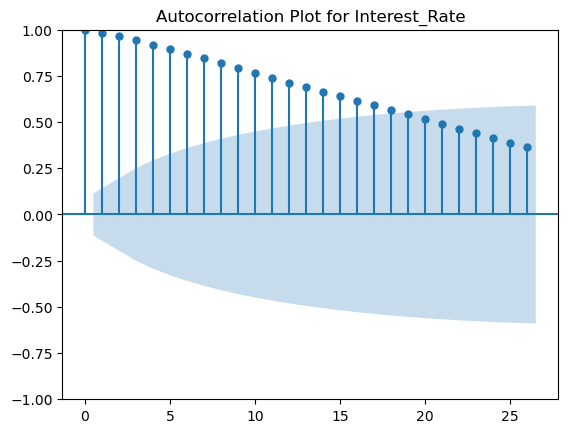

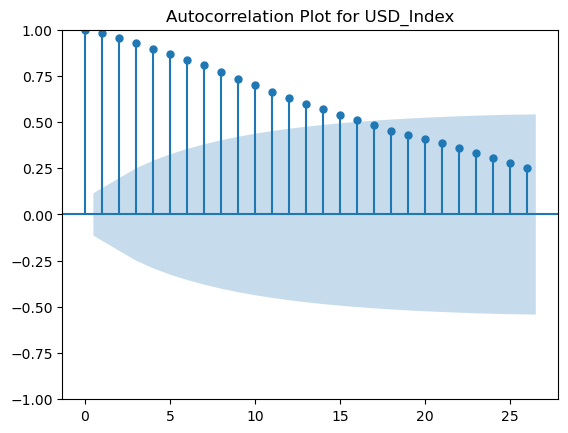

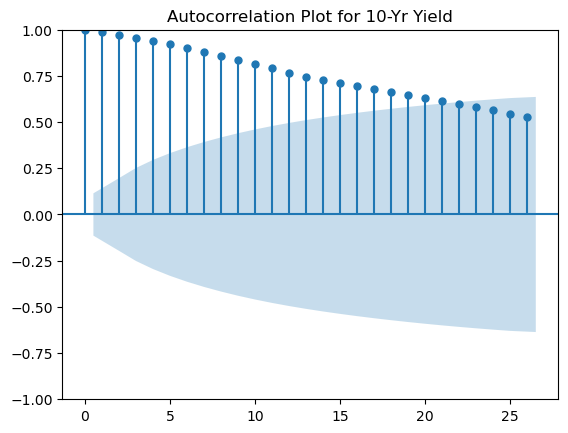

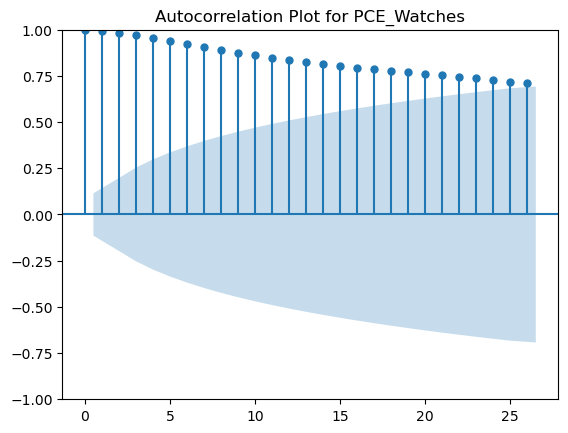

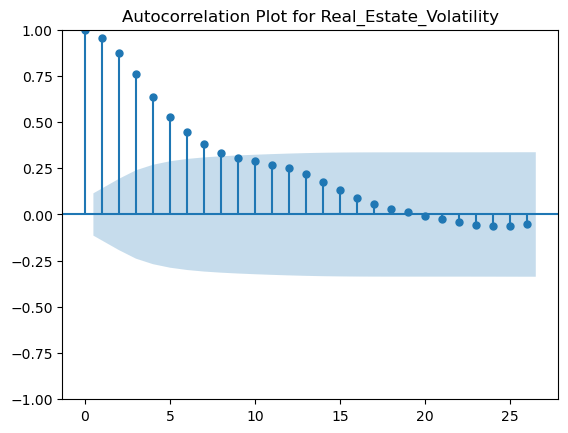

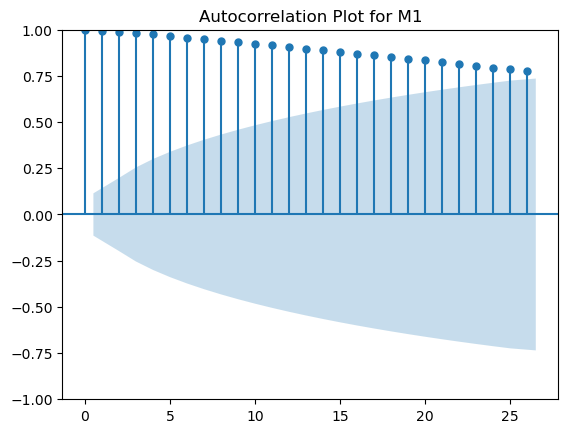

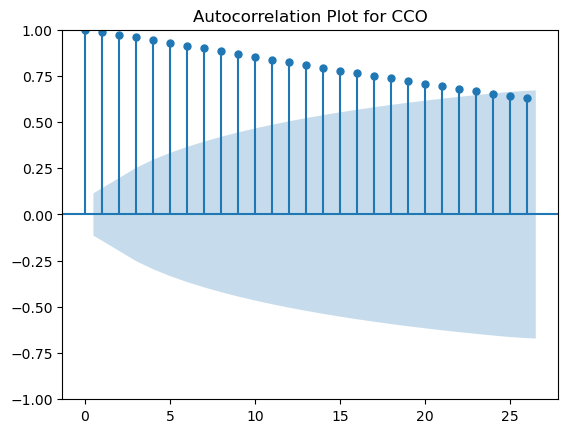

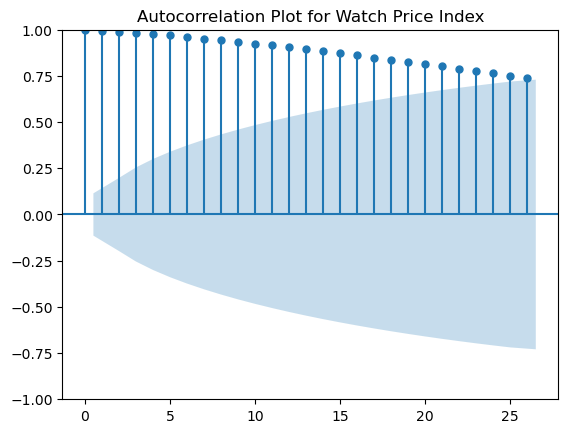

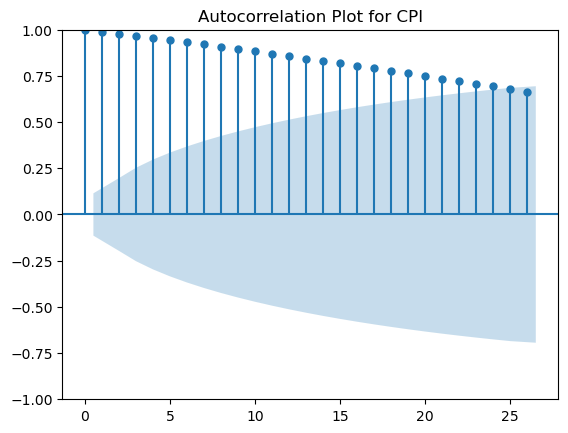

In [17]:
## Plot ACF and PACF plot

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Loop through each column in the DataFrame
for col in weekly_df.columns:
    # Plot the autocorrelation for each column
    plot_acf(weekly_df[col], lags=26)
    plt.title(f"Autocorrelation Plot for {col}")
    plt.show()

C:\Users\Hriday Govind\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


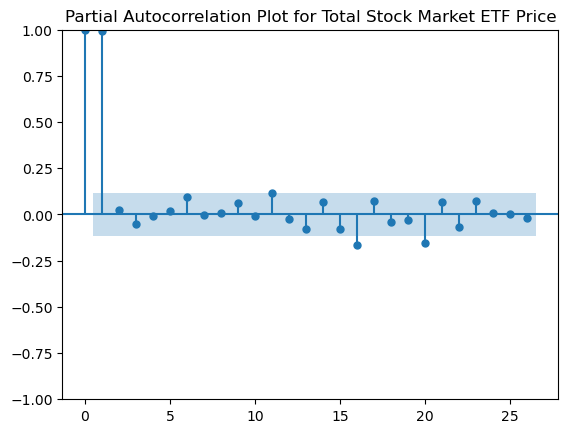

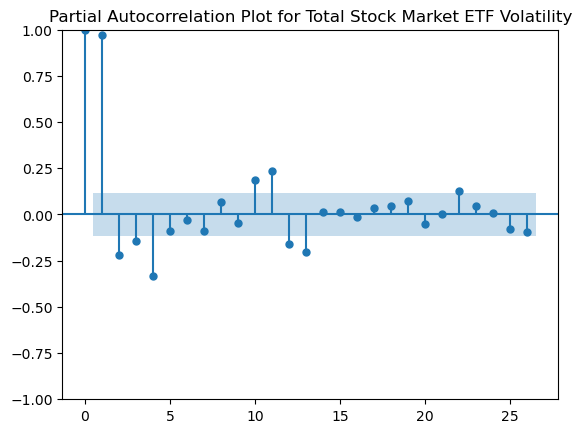

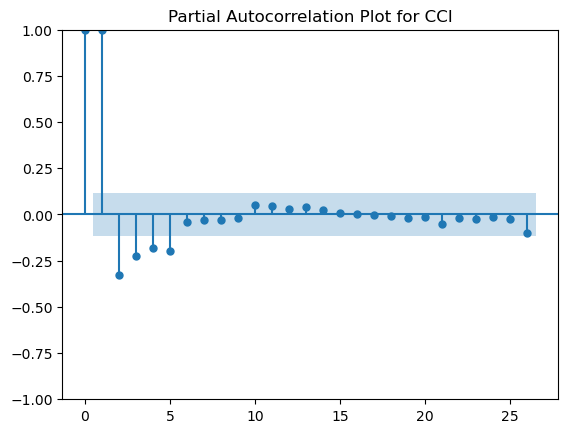

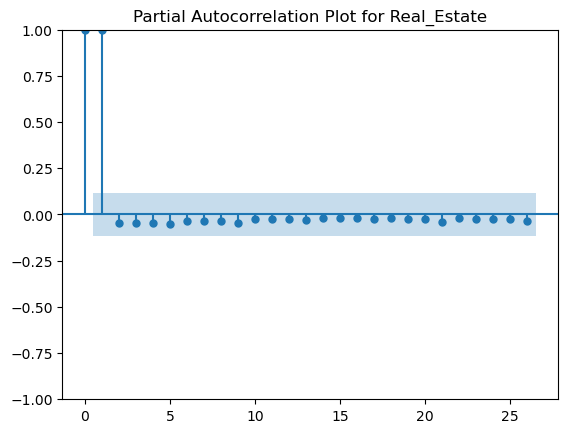

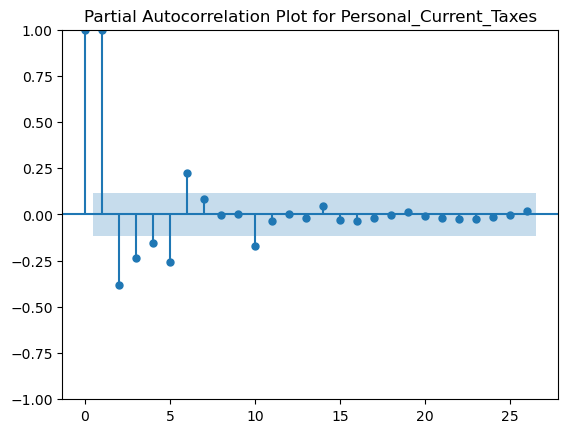

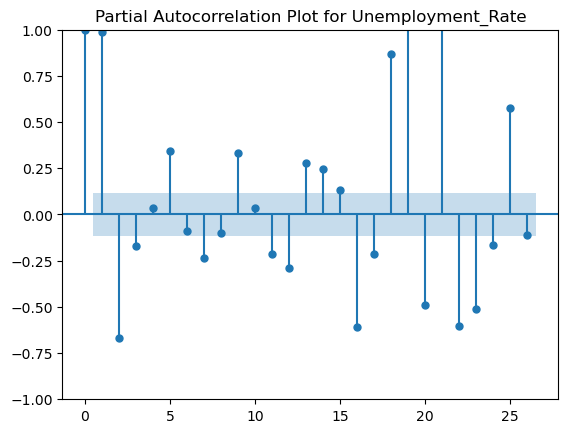

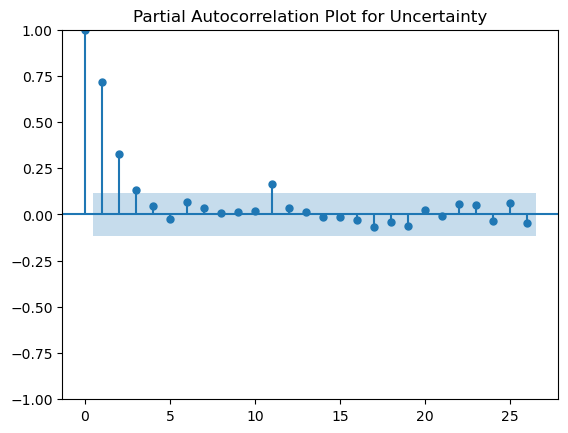

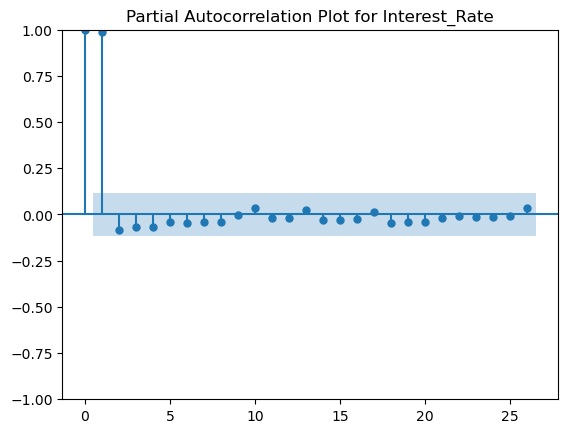

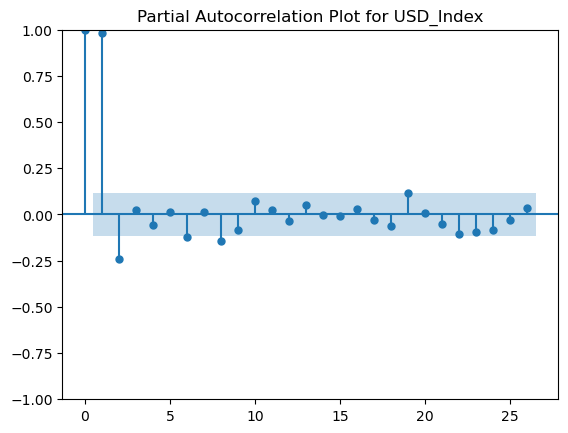

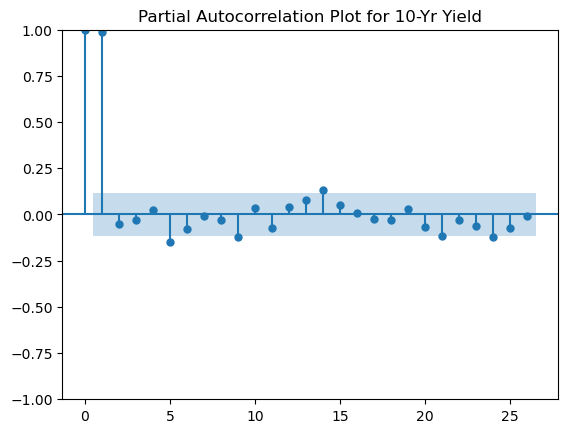

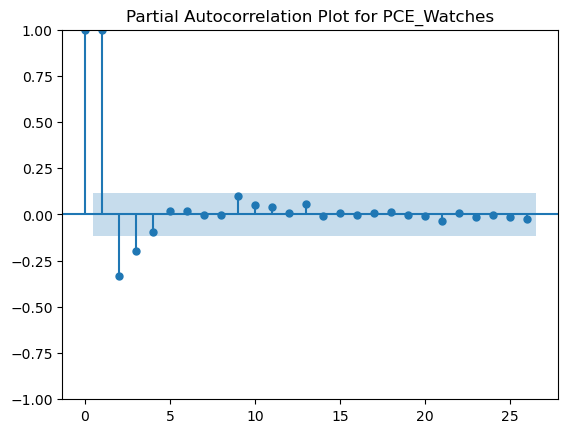

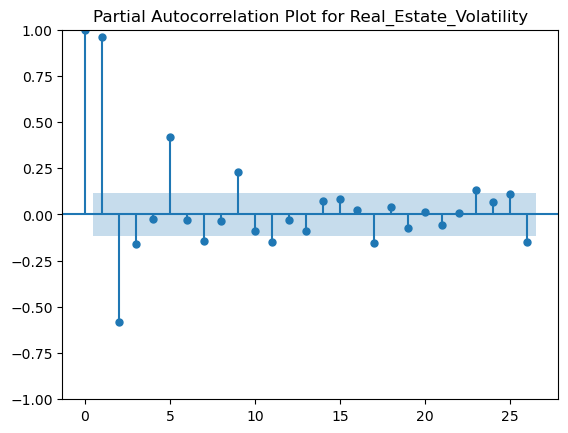

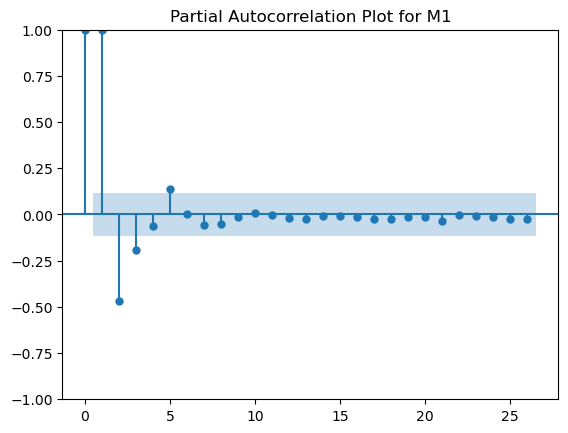

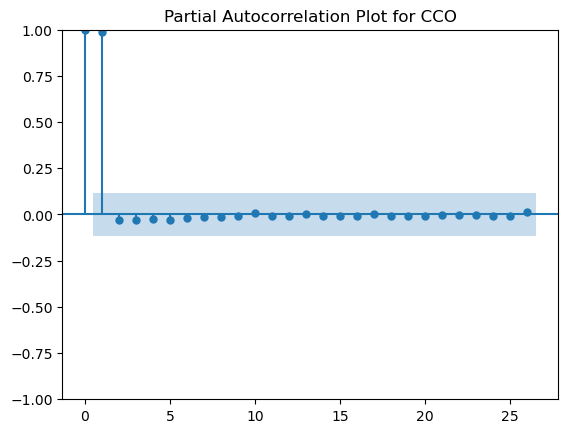

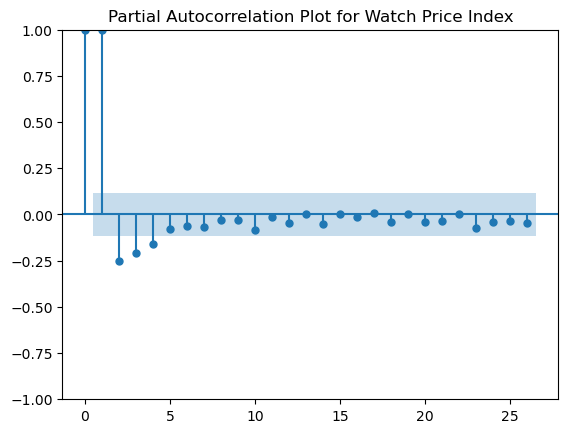

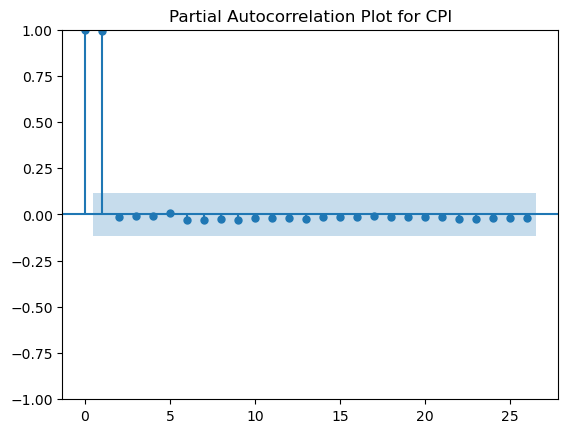

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Loop through each column in the DataFrame
for col in weekly_df.columns:
    # Plot the partial autocorrelation for each column
    plot_pacf(weekly_df[col], lags=26)
    plt.title(f"Partial Autocorrelation Plot for {col}")
    plt.show()